# 

### 

I acquired the following files to work on this project
download flights.csv.bz2 and weather.csv.bz2 datasets from
[package page on R documentation](https://www.rdocumentation.org/packages/nycflights13/versions/1.0.0)


## About the Problem Set: 

This problem set is rather similar to ones used for R, dplyr, and
flights data.  Just we use python and pandas.

I will analyze the nycflights13 data (in the R package of the
                                               same name).  The
                                               necessary csv
explanations is on the the [package page on R documentation](https://www.rdocumentation.org/packages/nycflights13/versions/1.0.0). 

1. perform a basic exploratory analysis on
an example dataset, bringing to bear all of my new skills in data
manipulation and visualization

## Preliminaries

You should also make sure the following libraries load correctly.
Below are a few basic data description tasks already done for you. 

In [54]:
#IPython is what you are using now to run the notebook
import IPython
print( "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with arrays and matrices
import numpy as np
print( "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print( "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print( "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib.pyplot as plt  
from pylab import *
print( "Mapltolib version:    %6.6s (need at least 1.2.1)" %
       matplotlib.__version__)
%matplotlib inline
# necessary for in-line graphics

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print( "Scikit-Learn version: %6.6s (need at least 0.13.1)" %
       sklearn.__version__)
import os
# for certain system-related functions

IPython version:       7.4.0 (need at least 1.0)
Numpy version:        1.16.2 (need at least 1.7.1)
SciPy version:         1.2.1 (need at least 0.12.0)
Pandas version:       0.24.2 (need at least 0.11.0)
Mapltolib version:     3.0.3 (need at least 1.2.1)
Scikit-Learn version: 0.20.3 (need at least 0.13.1)


In [55]:
## Let's read the data and print some summary information
## adjust the path for your file system!
## you can find the path like this:
path = os.getcwd()
print(path)
flights_df= pd.read_csv('flights.csv.bz2')

C:\Users\i514120\Documents\Curriculum\IMT 574\ProblemSet1


In [56]:
## Extract some basic information about the data like number of rows,
## columns, column names, data types
print(flights_df.shape)
print(flights_df.columns)
print(flights_df.dtypes)

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [57]:
## print the first and last few lines of the data
print("head\n", flights_df.head())
print("tail\n", flights_df.tail())
## Find the number of unique destinations in the data ('dest')
print("destinations:\n", flights_df.dest.unique())


head
    Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  arr_delay  \
0           1  2013      1    1     517.0        2.0     830.0       11.0   
1           2  2013      1    1     533.0        4.0     850.0       20.0   
2           3  2013      1    1     542.0        2.0     923.0       33.0   
3           4  2013      1    1     544.0       -1.0    1004.0      -18.0   
4           5  2013      1    1     554.0       -6.0     812.0      -25.0   

  carrier tailnum  flight origin dest  air_time  distance  hour  minute  
0      UA  N14228    1545    EWR  IAH     227.0      1400   5.0    17.0  
1      UA  N24211    1714    LGA  IAH     227.0      1416   5.0    33.0  
2      AA  N619AA    1141    JFK  MIA     160.0      1089   5.0    42.0  
3      B6  N804JB     725    JFK  BQN     183.0      1576   5.0    44.0  
4      DL  N668DN     461    LGA  ATL     116.0       762   5.0    54.0  
tail
         Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  \
336771    

## Some Tips

* This assignment involves extensive Data frame splitting and
  aggregation. You should look into the details of the methods
  groupby, transform, sum, count, mean etc 
* Many of the tasks in the assignment can be done either through the
  Pandas Data Frame or by converting the data frames to Series. Many
  of the methods in the numpy are applicable to Series only. When
  stuck, try to explore the type of object (Pandas Data Frame or Numpy
  Series) you are dealing with. 

## Question 1

Let’s explore flights from NYC to LA. Use the flights dataset to answer the following questions.

### (a)

How many flights were there from NYC airports to Los Angeles International Airport (LAX) in 2013?

In [58]:
# Your code here
Grouped_by_dest= flights_df.groupby(['dest']).get_group('LAX')
Grouped_by_dest['flight'].count()

16174

Answer: There were 16174 flights from NYC to LAX in 2013

### (b)

Which airline ('carrier') has the most flights from NYC to LAX? Which one has the least number of flights? Report the numbers respectively. 

In [59]:
# Your code here
# Check number of flights for each airline
LAX_carrier=Grouped_by_dest.groupby(['carrier']).count()
LAX_carrier=LAX_carrier.sort_values('flight', ascending=False)
LAX_carrier['flight']

carrier
UA    5823
AA    3582
VX    2580
DL    2501
B6    1688
Name: flight, dtype: int64

Answer: UA(United Airlines) had the highest number of flights from NYC to LAX and B6(JetBlue) had the least

### (c)

How many unique air planes fly from NYC to LAX?
(Hint: use 'tailnum', essentially the license plate of airplane)

In [60]:
# Your code here
Grouped_by_dest.tailnum.dropna().nunique()

991

Answer: There are 991 unique airplanes from NYC to LAX

### (d)

What is the average arrival delay for flights from NYC to LAX?

In [334]:
# Your code here
Grouped_by_dest.arr_delay.dropna().mean()

0.5471109447148383

Answer: average arrival delay for flights from NYC to LAX is 0.5 minute

### (e)

What proportion of flights to LAX come from each NYC airport?

In [335]:
# Your code here
LAX_origin=Grouped_by_dest[['origin','flight']].groupby(['origin']).count().sort_values('flight', ascending=False).apply(lambda g: g*100 / g.sum())
LAX_origin

,flight
origin,
JFK,69.630271
EWR,30.369729


Answer: Around 70% of flight come from JFK to LAX and 30% of flights come from EWR to LAX

## Question 2

Now let's explore the entire NYC flight dataset. Flights are often delayed. Consider the following questions exploring delay patterns.

### (a)

Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [87]:
# Your code here
flights_df['date'] = flights_df['year'].astype(str) + "-" + flights_df['month'].astype(str) + "-" + flights_df['day'].astype(str)
avg_date=flights_df.groupby(['date']).mean()
avg_date.sort_values(['dep_delay'], ascending = False)['dep_delay'].head(1)

date
2013-3-8    83.536921
Name: dep_delay, dtype: float64

In [88]:
avg_date.sort_values(['arr_delay'], ascending = False)['arr_delay'].head(1)

date
2013-3-8    85.862155
Name: arr_delay, dtype: float64

Answer:  

largest average departure delay:83.536921 date: 2013-3-8

largest average arrival delay:85.862155 date: 2013-3-8

### (b)

What was the worst day and the best day to fly out of NYC in 2013
if you dislike delayed flights?

Note: we ask the largest delay given there was a (positive) delay, we
don't care about flights that were in time or early.

In [342]:
# Your code here
dep_delay = flights_df[flights_df['dep_delay'] > 0]
dep_delay=dep_delay.groupby(['date']).mean()
dep_delay.sort_values(['dep_delay'], ascending = False)['dep_delay'].head(1)

date
2013-3-8    102.903522
Name: dep_delay, dtype: float64

In [343]:
dep_delay.sort_values(['dep_delay'], ascending = True)['dep_delay'].head(1)

date
2013-11-9    17.156028
Name: dep_delay, dtype: float64

Answer:

worst day delay:102.903522 date: 2013-3-8

best day delay:17.156028 date: 2013-11-9

### (c)

On average which airline has the lowest departure delay for
   their NYC flights in 2013 in this dataset? and which one has the
   greatest departure delay?

Note: here we want to include both positive and negative delays (early departures)   

In [344]:
# Your code here
dep_carrier=flights_df.groupby(['carrier']).mean()
dep_carrier.sort_values(['dep_delay'], ascending = False)['dep_delay'].head(1)

carrier
F9    20.215543
Name: dep_delay, dtype: float64

In [345]:
dep_carrier.sort_values(['dep_delay'], ascending = True)['dep_delay'].head(1)

carrier
US    3.782418
Name: dep_delay, dtype: float64

Answer:

greatest departure delay: 20.215543   carrier: F9

lowest departure delay: 3.782418   carrier: US

### (d)

Are there any seasonal patterns in departure delays for flights from NYC?

Text(0, 0.5, 'Avg Departure delay')

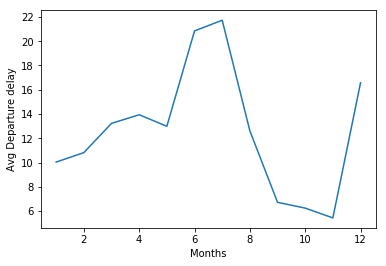

In [346]:
# Your code here
import matplotlib.pyplot as plt

plt.plot(flights_df.groupby('month')['dep_delay'].mean())
plt.xlabel('Months')
plt.ylabel('Avg Departure delay')
#plt.show()

Answer: It looks like the delays are more during the summer i.e. from June to August. This could be possible because these are considered holidays and hence airports are crowded.
Also, there is a spike in December which is also a holiday season time.

Text(0, 0.5, 'Avg number of flights')

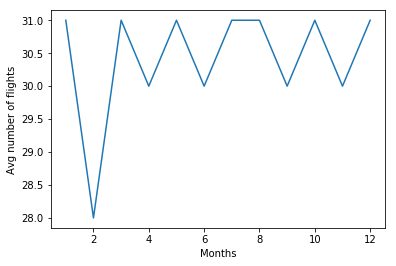

In [347]:
#using positive delays
plt.plot(dep_delay.groupby('month')['dep_delay'].count())
plt.xlabel('Months')
plt.ylabel('Avg number of flights')

Answer: number of positive delays do not point out anything concrete about the season. However, there were very less number of delays in february

### (e)

On average, how do departure delays vary over the course of a day?

Text(0, 0.5, 'Avg Departure delay')

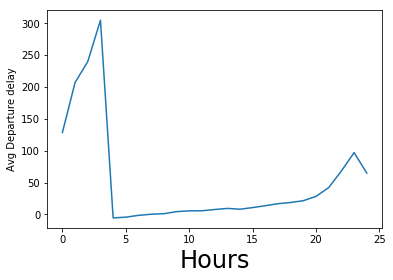

In [348]:
# Your code here
day_dep_delay=flights_df.dropna(subset=['dep_delay','hour'])
plt.plot(day_dep_delay.groupby('hour')['dep_delay'].mean())
plt.xlabel('Hours', size=24)
plt.ylabel('Avg Departure delay')

Answer: Delays are high during midnight from 12-4 am, post which the delays are less. It Starts to spike again after 8pm. 

## Question 3

Which flight departing NYC in 2013 flew the slowest?

Note: compute the speed as distance/time.

In [349]:
# Your code here
flights_df.head()
#speed in miles per hour
flights_df['speed'] = flights_df['distance']/(flights_df['air_time']/60)
flights_df.sort_values('speed',ascending = True).head(1)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,date,speed,carrier_flight_dest
24098,24099,2013,1,28,1917.0,52.0,2118.0,103.0,US,N755US,1860,LGA,PHL,75.0,96,19.0,17.0,2013-1-28,76.8,US 1860 PHL


Answer: Flight from LGA to PHL on January 28th 2013 was the slowest with the speed 76.8 miles per hour.

## Question 4

Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [189]:
# Your code here
#creating a column for a unique carrier + flight + dest
flights_df['carrier_flight_dest'] = flights_df['carrier'].astype(str) + ' ' + flights_df['flight'].astype(str) + ' ' + flights_df['dest'].astype(str)

#checking the number of days in the year the flights flew from NYC
#unique_dates= flights_df.date.unique()
#unique_dates
#unique_dates.shape

#removed all the flights with duplicate entries of the date, in case a flight flies twice a day but does fly other days(to remove incorrect numbers)
unique_date_flight= flights_df.drop_duplicates(subset=['carrier_flight_dest','date'], keep='first')

#count the number of unique days for the unique flights 
count_year_flights=unique_date_flight.groupby('carrier_flight_dest').count().sort_values('date',ascending = False)
count_year_flights

#capturing flights that flew everyday in 365 days
all_year_flights = count_year_flights[count_year_flights['date'] > 364]
all_year_flights.reset_index(level=0, inplace=True)
final_list=all_year_flights[['carrier_flight_dest']]
final_list[['carrier','flight','dest']] = final_list['carrier_flight_dest'].str.split(" ",expand=True)
final_list

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,carrier_flight_dest,carrier,flight,dest
0,UA 15 HNL,UA,15,HNL
1,B6 371 FLL,B6,371,FLL
2,AA 181 LAX,AA,181,LAX
3,B6 219 CLT,B6,219,CLT
4,AA 119 LAX,AA,119,LAX
5,B6 703 SJU,B6,703,SJU
6,DL 2391 TPA,DL,2391,TPA
7,AA 1357 SJU,AA,1357,SJU
8,EV 5712 IAD,EV,5712,IAD
9,VX 251 LAS,VX,251,LAS


Answer: There are 17 such flights that fly everyday to different locations

In [192]:
final_list.groupby('dest').nunique()

,carrier_flight_dest,carrier,flight,dest
dest,,,,
BUR,1,1,1,1
CLT,1,1,1,1
FLL,1,1,1,1
HNL,1,1,1,1
IAD,1,1,1,1
LAS,1,1,1,1
LAX,4,2,4,1
MCO,2,2,2,1
MIA,1,1,1,1


Answer: above are all the destinations these flights go to, among all, LAX, MCO and SJU have more flights flying out on a daily basis. 

## Question 5

Develop one research question you can address using the nycflights2013
dataset. Provide two visualizations to support your exploration of
this question. Discuss what you find. 

Note: we'll using matplotlib for plotting in this course, but you can use something else too.

Question: Are departure delays in any way associated to the origin of the flight? Will be comparing dep delays in all the 3 airports of NYC 

Text(0, 0.5, 'Avg Departure delay')

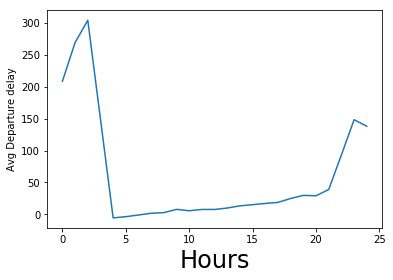

In [199]:
# Your code here
day_dep_delay=flights_df.dropna(subset=['dep_delay','hour'])
EWR=day_dep_delay[day_dep_delay['origin']=='EWR']
plt.plot(EWR.groupby('hour')['dep_delay'].mean())
plt.xlabel('Hours', size=24)
plt.ylabel('Avg Departure delay')
#flights_df.head()

Text(0, 0.5, 'Avg Departure delay')

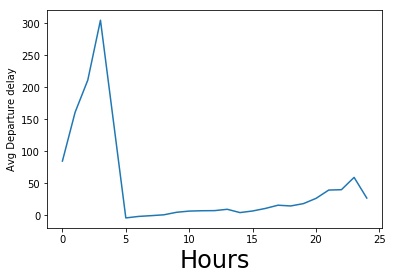

In [200]:
JFK=day_dep_delay[day_dep_delay['origin']=='JFK']
plt.plot(JFK.groupby('hour')['dep_delay'].mean())
plt.xlabel('Hours', size=24)
plt.ylabel('Avg Departure delay')

Text(0, 0.5, 'Avg Departure delay')

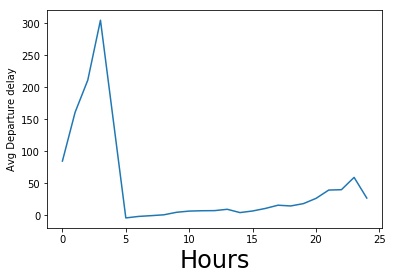

In [201]:
LGA=day_dep_delay[day_dep_delay['origin']=='LGA']
plt.plot(JFK.groupby('hour')['dep_delay'].mean())
plt.xlabel('Hours', size=24)
plt.ylabel('Avg Departure delay')

Answer: Accodring to the visualizations, EWR has more delays than LGA and JFK from 20 hrs- 4 hrs. Also, LGA and JFK notice more delays till 5 hrs which is lowered in case of EWR

Best destinations to fly from NYC WRT the average speed of flights flying to the destination 

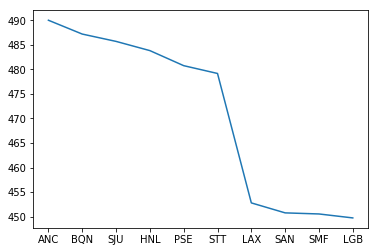

In [211]:
plot(flights_df.groupby('dest').mean().sort_values('speed',ascending = False)['speed'].head(10))

Worst destinations to fly to from NYC WRT the average speed of flights flying to the destination

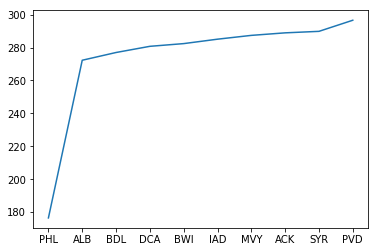

In [213]:
plot(flights_df.groupby('dest').mean().sort_values('speed',ascending = True)['speed'].head(10))

## Question 6

What weather conditions are associated with flight delays leaving NYC?  Use graphics to explore.

Note: you need to use 'weather.csv' dataset

In [284]:
# Your code here
weather_df= pd.read_csv('weather.csv.bz2')
#weather_df.month.dropna()
#weather_df['month']=weather_df['month'].astype(int)
#weather_df['date'] = weather_df['year'].astype(str) + "-" + weather_df['month'].astype(int).astype(str) + "-" + weather_df['day'].astype(int).astype(str)
weather_df.tail()

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
8714,8715,JFK,2013,9.0,2.0,20.0,75.20,73.40,94.14,200.0,4.60312,5.297178,0.0,NaN,4.0
8715,8716,JFK,2013,10.0,23.0,10.0,48.92,39.02,68.51,60.0,4.60312,5.297178,0.0,1008.1,10.0
8716,8717,JFK,2013,10.0,23.0,11.0,48.92,39.02,68.51,40.0,4.60312,5.297178,0.0,1008.5,10.0
8717,8718,JFK,2013,12.0,17.0,5.0,26.96,10.94,50.34,40.0,4.60312,5.297178,0.0,1023.9,10.0
8718,8719,LGA,2013,8.0,22.0,22.0,75.92,66.92,73.68,210.0,8.05546,9.270062,0.0,1011.9,10.0


In [312]:
#keeping only positive delays for the analysis as aggregation of negative delays gives an incorrect mean
dep_delay = flights_df[flights_df['dep_delay'] > 0]
#dep_delay

#using groupby to aggregate the mean delay
flight_DD= dep_delay.groupby(['year','month','day','hour','origin']).mean().reset_index()
#flight_DD

#sorting delays in descending order
flight_depDelay=flight_DD[['year','month','day','hour','origin','dep_delay']].sort_values('dep_delay',ascending = False)
#flight_depDelay
#flight_depDelay.head()

#merging weather data with flight in an inner join so that only valid values are used for analysis
weather_flgt = pd.merge(weather_df, flight_depDelay, on = ['year','month','day','hour','origin'], how = 'inner')
weather_flgt.head()


,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,dep_delay
0,6,EWR,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0,8.400000
1,7,EWR,2013,1.0,1.0,7.0,39.02,26.96,61.63,250.0,8.05546,9.270062,0.0,1012.3,10.0,22.250000
2,8,EWR,2013,1.0,1.0,8.0,39.02,28.04,64.43,240.0,11.50780,13.242946,0.0,1012.5,10.0,5.500000
3,9,EWR,2013,1.0,1.0,9.0,39.92,28.04,62.21,250.0,12.65858,14.567241,0.0,1012.2,10.0,35.428571
4,10,EWR,2013,1.0,1.0,10.0,39.02,28.04,64.43,260.0,12.65858,14.567241,0.0,1011.9,10.0,10.428571


In [267]:
import seaborn as sns

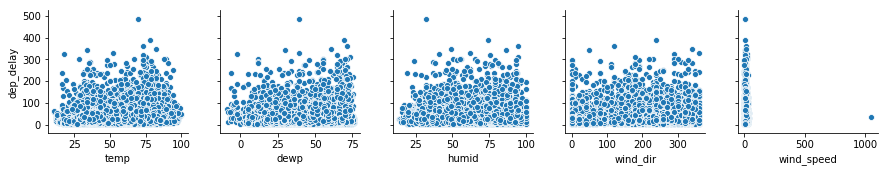

In [326]:
sns.pairplot(data=weather_flgt, y_vars=['dep_delay'],
                  x_vars=['temp', 'dewp', 'humid','wind_dir','wind_speed'])

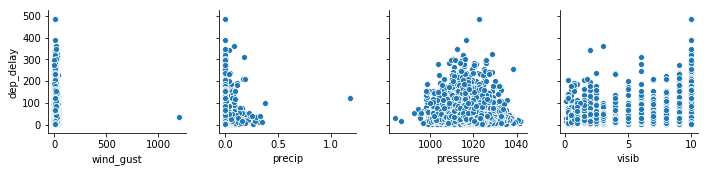

In [327]:
sns.pairplot(data=weather_flgt, y_vars=['dep_delay'],
                  x_vars=['wind_gust','precip','pressure','visib'])

In [328]:
#removing outliers to understand all variables
weather_flgt = weather_flgt[weather_flgt['wind_speed'] < 1000]
weather_flgt = weather_flgt[weather_flgt['wind_gust'] < 1000]
weather_flgt = weather_flgt[weather_flgt['precip'] < 1]

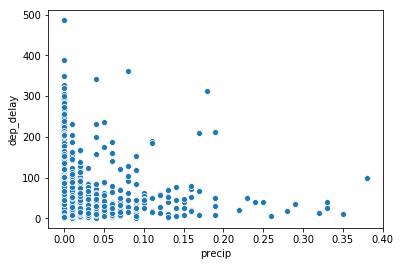

In [330]:
ax = sns.scatterplot(y="dep_delay", x="precip", data=weather_flgt)

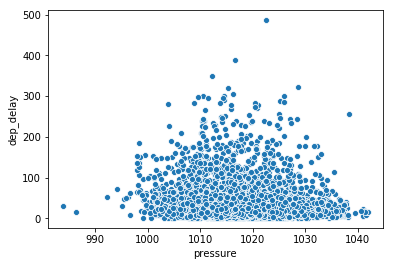

In [331]:
ax = sns.scatterplot(y="dep_delay", x="pressure", data=weather_flgt)

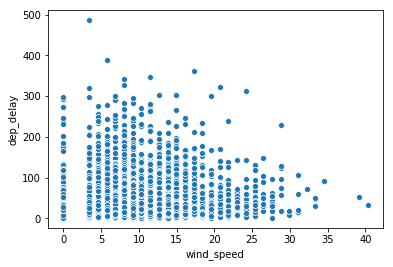

In [332]:
ax = sns.scatterplot(y="dep_delay", x="wind_speed", data=weather_flgt)

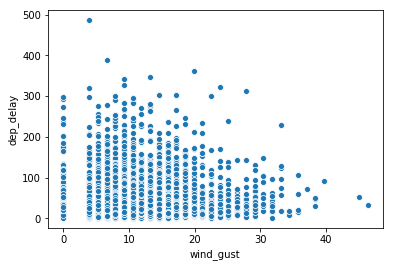

In [333]:
ax = sns.scatterplot(y="dep_delay", x="wind_gust", data=weather_flgt)

Answer: 

Precipitation: As observed, when the precipitation increases, the average departure delay reduces which makes sense because lower the precipitation it means there is snow, sleet or a freezing rain hence with higher precipitation, flight delays are less

Pressure: It seems like there is a barometric pressure window which leads to higher delays. Pressure lesser than the window has lower delays and higher than the window also have lower delays

Wind_speed and Wind_gust: lower wind speed and wind gust shows more delays. 

# Grading

* Q1: 1pt each question (5 in total)
* Q2: a) 2pt, b) 3pt, c) 2pt, d) 2pt, e) 1pt
* Q3: 5pt
* Q4: 5pt
* Q5: 15pt
* Q6: 10pt